**Ensemble Learning**


========== Q6: Bagging vs Single Tree on Iris ==========
Decision Tree accuracy: 0.9333
Bagging (50 trees) accuracy: 0.9333

Decision Tree Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]

Bagging Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

========== Q7: Random Forest on Wine (feature importances) ==========
Random Forest Test Accuracy: 1.0000
Random Forest OOB Score: 0.9758

Top feature importances:
 color_intensity                 0.164947
flavanoids                      0.154674
alcohol                         0.146022
proline                         0.142511
od280/od315_of_diluted_wines    0.094885
dtype: float64


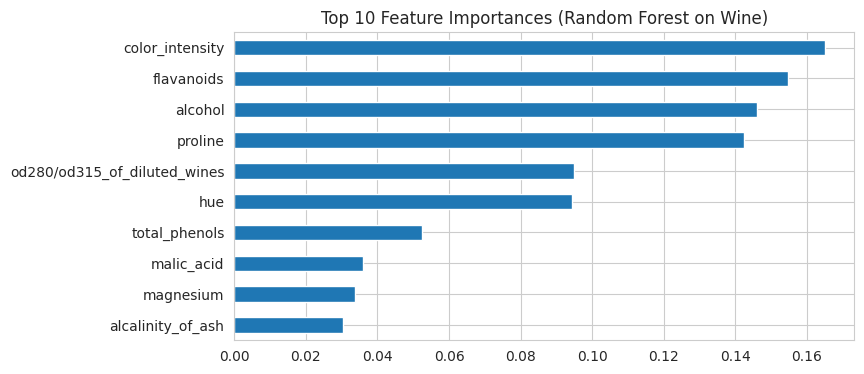


========== Q8: AdaBoost on Breast Cancer ==========


TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sns.set_style('whitegrid')
np.random.seed(42)

# =====================================================
# Q1. What is Ensemble Learning and how does it work?
# =====================================================
# Ensemble learning combines multiple base models (learners) to produce a single
# improved model. The idea: Multiple weak/strong learners aggregated appropriately
# (voting, averaging, stacking, boosting) often achieve better generalization than a single model.
#
# Common ensemble strategies:
# - Bagging (Bootstrap Aggregating): Train many models on different bootstrap samples and average/vote.
# - Boosting: Train models sequentially where each model focuses on the mistakes of previous ones.
# - Stacking: Train base learners and then use their predictions as inputs to a meta-learner.
# - Voting: Combine predictions of different models by majority (hard) or averaged probabilities (soft).

# =====================================================
# Q2. Bagging vs Boosting — key differences
# =====================================================
# Bagging:
# - Parallel training of base models on bootstrap samples.
# - Aims to reduce variance (e.g., Random Forest).
# - Each model trained independently; final decision by averaging/voting.
#
# Boosting:
# - Sequential training of weak learners; each focuses on previously misclassified samples.
# - Aims to reduce bias and build a strong learner from weak learners (e.g., AdaBoost, Gradient Boosting).
# - More prone to overfitting if not regularized, but often yields high accuracy.

# =====================================================
# Q3. What is Random Forest and how does it work?
# =====================================================
# Random Forest is an ensemble of decision trees (bagged trees) with two sources of randomness:
# 1) Each tree is trained on a bootstrap sample of data (bagging).
# 2) At each split, a random subset of features is considered (feature bagging).
# This reduces correlation between trees and lowers variance with good predictive performance.

# =====================================================
# Q4. What is AdaBoost and how does it work?
# =====================================================
# AdaBoost (Adaptive Boosting) sequentially trains weak learners (commonly shallow decision trees).
# After each round, sample weights are updated: misclassified samples receive higher weights so that
# the next learner focuses on them. Final prediction is weighted sum (or sign) of learners' predictions.

# =====================================================
# Q5. Gradient Boosting and differences (brief)
# =====================================================
# Gradient Boosting builds learners sequentially by fitting each new model to the negative gradient
# (residual) of the loss function with respect to current ensemble predictions (e.g., residuals for squared error).
# Many modern variants (XGBoost, LightGBM, CatBoost) add optimizations and regularization.

# =====================================================
# Q6. Bagging (BaggingClassifier) on Iris dataset — compare with single Decision Tree
# =====================================================
print("\n" + "="*10 + " Q6: Bagging vs Single Tree on Iris " + "="*10)

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_tr, y_tr)
y_pred_dt = dt.predict(X_te)
acc_dt = accuracy_score(y_te, y_pred_dt)

# Bagging with Decision Trees
bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42, n_jobs=-1)
bag.fit(X_tr, y_tr)
y_pred_bag = bag.predict(X_te)
acc_bag = accuracy_score(y_te, y_pred_bag)

print(f"Decision Tree accuracy: {acc_dt:.4f}")
print(f"Bagging (50 trees) accuracy: {acc_bag:.4f}")

# Show confusion matrices
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_te, y_pred_dt))
print("\nBagging Confusion Matrix:\n", confusion_matrix(y_te, y_pred_bag))

# =====================================================
# Q7. Random Forest on Wine dataset — MSE/Accuracy & Feature Importances
# =====================================================
print("\n" + "="*10 + " Q7: Random Forest on Wine (feature importances) " + "="*10)
wine = datasets.load_wine()
Xw, yw = wine.data, wine.target
Xw_tr, Xw_te, yw_tr, yw_te = train_test_split(Xw, yw, test_size=0.3, random_state=42, stratify=yw)

rf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42, n_jobs=-1)
rf.fit(Xw_tr, yw_tr)
y_pred_rf = rf.predict(Xw_te)
acc_rf = accuracy_score(yw_te, y_pred_rf)

print(f"Random Forest Test Accuracy: {acc_rf:.4f}")
# OOB score (if available)
if hasattr(rf, "oob_score_"):
    print(f"Random Forest OOB Score: {rf.oob_score_:.4f}")

# Feature importances
feat_imp = pd.Series(rf.feature_importances_, index=wine.feature_names).sort_values(ascending=False)
print("\nTop feature importances:\n", feat_imp.head())

# Plot importances
plt.figure(figsize=(8,4))
feat_imp.head(10).plot.barh()
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest on Wine)")
plt.show()

# =====================================================
# Q8. AdaBoost on Breast Cancer dataset — accuracy and comparison with base learner
# =====================================================
print("\n" + "="*10 + " Q8: AdaBoost on Breast Cancer " + "="*10)
bc = datasets.load_breast_cancer()
Xb, yb = bc.data, bc.target
Xb_tr, Xb_te, yb_tr, yb_te = train_test_split(Xb, yb, test_size=0.3, random_state=42, stratify=yb)

# Base weak learner: shallow tree
base = DecisionTreeClassifier(max_depth=1, random_state=42)
ada = AdaBoostClassifier(base_estimator=base, n_estimators=100, random_state=42)
ada.fit(Xb_tr, yb_tr)
y_pred_ada = ada.predict(Xb_te)
acc_ada = accuracy_score(yb_te, y_pred_ada)

# Base tree for comparison
base.fit(Xb_tr, yb_tr)
y_pred_base = base.predict(Xb_te)
acc_base = accuracy_score(yb_te, y_pred_base)

print(f"AdaBoost accuracy: {acc_ada:.4f}")
print(f"Base stump accuracy: {acc_base:.4f}")
print("\nClassification report (AdaBoost):\n", classification_report(yb_te, y_pred_ada, target_names=bc.target_names))

# =====================================================
# Q9. Voting and Stacking ensembles on Wine dataset — compare with base learners
# =====================================================
print("\n" + "="*10 + " Q9: Voting & Stacking on Wine " + "="*10)
# Prepare scaled data for models that need scaling
scaler = StandardScaler()
Xw_tr_s = scaler.fit_transform(Xw_tr)
Xw_te_s = scaler.transform(Xw_te)

# Base learners
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = SVC(kernel='rbf', probability=True, random_state=42)

# Voting classifier (soft voting)
voting = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)], voting='soft')
voting.fit(Xw_tr_s, yw_tr)
acc_voting = accuracy_score(yw_te, voting.predict(Xw_te_s))

# Stacking classifier
stack = StackingClassifier(estimators=[('lr', clf1), ('dt', clf2), ('svc', clf3)],
                           final_estimator=LogisticRegression(), n_jobs=-1)
stack.fit(Xw_tr_s, yw_tr)
acc_stack = accuracy_score(yw_te, stack.predict(Xw_te_s))

# Individual learners for comparison
clf1.fit(Xw_tr_s, yw_tr)
clf2.fit(Xw_tr_s, yw_tr)
clf3.fit(Xw_tr_s, yw_tr)

acc_lr = accuracy_score(yw_te, clf1.predict(Xw_te_s))
acc_dt = accuracy_score(yw_te, clf2.predict(Xw_te_s))
acc_svc = accuracy_score(yw_te, clf3.predict(Xw_te_s))

print(f"Logistic Regression accuracy: {acc_lr:.4f}")
print(f"Decision Tree accuracy: {acc_dt:.4f}")
print(f"SVC accuracy: {acc_svc:.4f}")
print(f"Voting Ensemble accuracy: {acc_voting:.4f}")
print(f"Stacking Ensemble accuracy: {acc_stack:.4f}")

# =====================================================
# Q10. Practical considerations: when to use ensembles, tuning & avoiding overfitting
# =====================================================
# - Use ensembles when:
#   * Single model underfits or overfits (ensembles can reduce variance or bias).
#   * You want robust performance across many data subsets.
# - Avoid overfitting:
#   * Use cross-validation; monitor validation performance vs training performance.
#   * For bagging methods: increase number of estimators, constrain tree depth (max_depth), set min_samples_leaf.
#   * For boosting methods: use learning_rate, regularize (subsample, max_depth), early stopping.
# - Hyperparameter tuning example (Random Forest):
print("\n" + "="*10 + " Q10: Hyperparameter tuning example (Random Forest GridSearch) " + "="*10)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=4, n_jobs=-1)
grid.fit(Xw_tr, yw_tr)
print("Best RF params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


